In [1]:
import PIL
from PIL import Image
import pytesseract
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
image = cv2.imread('tony4.jpg')

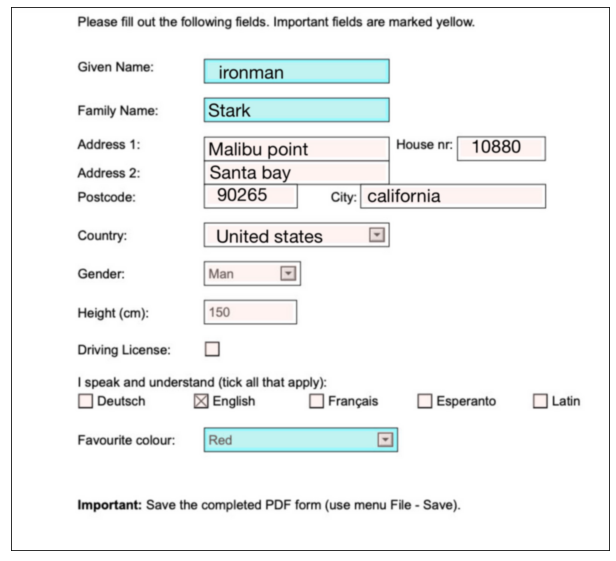

In [23]:
plt.figure(figsize=(12,10))
plt.imshow(image,interpolation = 'bicubic',)

plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
black = (0,0,0)
white = (255,255,255)
threshold = (160,160,160)

# Open input image in grayscale mode and get its pixels.
raw_img = Image.open("tony3.jpg").convert("LA")
pixels = raw_img.getdata()

newPixels = []

# Compare each pixel 
for pixel in pixels:
    if pixel < threshold:
        newPixels.append(black)
    else:
        newPixels.append(white)

# Create and save new image.
processed_img = Image.new("RGB",raw_img.size)
processed_img.putdata(newPixels)

In [35]:
text = pytesseract.image_to_string(processed_img,lang="eng")

In [36]:
print(text)

Please fill out the following fields. Important fields are marked yellow.

Given Name: IRONMAN
FamiyName: [Stark

   

      
     

Address 1: Malibu point House nr: 1 0880
Address 2: Santa bay
Postcode: City:| california

 

Country: United states a

Gender: Man [=]
Height (cm): 150

Driving License: oO

| speak and understand {tick all that apply):
(J Deutsch English (J Frangais (_] Esperanto ] Latin

Favourite colour: Red [=]

 

important: Save the completed PDF form (use menu File - Save).


In [37]:
import re

keyfile = "key.txt"
testfile = "raw.txt"

keys = set(key.lower() for key in 
    re.findall(r'\w+', open(keyfile , "r").readline()))

with open(testfile) as f:
    with open("processed.txt","a+")as p:
        
        for line in f:
            words = set(word.lower() for word in re.findall(r'\w+', line))
            if keys & words:
                p.write(line)
                print(line, end='')
                

Given Name: IRONMAN
FamiyName: [Stark
Address 1: Malibu point House nr: 1 0880
Address 2: Santa bay
Postcode: City:| california
Country: United states a
Gender: Man [=]
Height (cm): 150
Driving License: oO


In [38]:
string = "Given Name: IRONMAN"
Dict = dict((x.strip(), y.strip()) for x, y in (element.split(':') for element in string.split(', ')))

In [39]:
import pandas as pd
dataset=pd.read_csv("processed.txt",delimiter=":",header=None)

In [40]:
df=dataset.T
df

,0,1,2,3,4,5,6,7,8,9,10
0,Given Name,FamiyName,Address 1,House nr,Address 2,Postcode,City,Country,Gender,Height (cm),Driving License
1,IRONMAN,[Stark,Malibu point,1 0880,Santa bay,,| california,United states a,Man [=],150,oO
